In [1]:
# Packages importation

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import numpy as np

In [6]:
# Importing dataset

In [7]:
data = pd.read_csv('H:\Meu_Github\Dataset_Analysis\Restaurants\Future50.csv')

In [8]:
data

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [9]:
# Dataset analysis

In [10]:
data.shape

(50, 9)

In [11]:
data.columns

Index(['Rank', 'Restaurant', 'Location', 'Sales', 'YOY_Sales', 'Units',
       'YOY_Units', 'Unit_Volume', 'Franchising'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


In [13]:
data.describe()

,Rank,Sales,Units,Unit_Volume
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,33.780000,34.700000,1592.60000
std,14.57738,9.596534,24.527577,994.67677
min,1.00000,20.000000,7.000000,465.00000
25%,13.25000,24.250000,16.000000,867.50000
50%,25.50000,34.500000,27.000000,1260.00000
75%,37.75000,42.000000,45.500000,2020.00000
max,50.00000,49.000000,105.000000,4300.00000


In [14]:
data.isnull().sum()

Rank           0
Restaurant     0
Location       0
Sales          0
YOY_Sales      0
Units          0
YOY_Units      0
Unit_Volume    0
Franchising    0
dtype: int64

In [15]:
# Erasing Ranks

In [16]:
data = data.drop(columns=['Rank'],axis=1)

In [17]:
data

,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [18]:
# Grouping by Location

In [19]:
location = data.groupby("Location").mean()

In [20]:
location

,Sales,Units,Unit_Volume
Location,,,
"Agoura Hills, Calif.",31.000000,13.000,2550.000000
"Anaheim, Calif.",27.000000,27.000,1130.000000
"Atlanta, Ga.",29.000000,21.000,1510.000000
"Belmar, N.J.",39.000000,76.000,580.000000
"Blue Bell, Pa.",24.000000,36.000,775.000000
"Charlotte, N.C.",42.000000,66.000,1050.000000
"Columbus, Ohio",41.333333,32.000,1711.666667
"Conway, Ark.",25.000000,16.000,1620.000000
"Denver, Colo.",41.000000,63.000,890.000000


In [21]:
# State column creation (the str[value] 0 = before character 1 = after character)

In [22]:
data['State'] = data['Location'].str.split(',').str[1]

In [23]:
data

,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,State
0,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No,Wash.
1,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,N.C.
2,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes,Calif.
3,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes,N.C.
4,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,Calif.
5,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes,N.J.
6,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes,Pa.
7,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes,N.Y.
8,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes,Calif.
9,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No,Ky.


In [24]:
State = data.groupby("State").mean()

In [25]:
State

,Sales,Units,Unit_Volume
State,,,
Calif.,24.000000,60.000000,465.000000
N.J.,39.000000,76.000000,580.000000
Ariz.,20.000000,7.000000,3120.000000
Ark.,25.000000,16.000000,1620.000000
Calif.,35.000000,37.333333,1558.333333
Colo.,41.000000,63.000000,890.000000
D.C.,45.000000,35.000000,1350.000000
Fla.,31.000000,16.000000,3120.000000
Ga.,29.666667,24.333333,1333.333333


In [26]:
State.shape

(23, 3)

In [27]:
# Correcting California Calif duplication error

In [28]:
State.duplicated()

State
  Calif.    False
  N.J.      False
 Ariz.      False
 Ark.       False
 Calif.     False
 Colo.      False
 D.C.       False
 Fla.       False
 Ga.        False
 Ky.        False
 Mo.        False
 N.C.       False
 N.J.       False
 N.Y.       False
 Neb.       False
 Ohio       False
 Ore.       False
 Pa.        False
 S.C.       False
 Tenn.      False
 Texas      False
 Va.        False
 Wash.      False
dtype: bool

In [29]:
import re

In [30]:
cdata = data

In [31]:
cdata

,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,State
0,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No,Wash.
1,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,N.C.
2,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes,Calif.
3,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes,N.C.
4,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,Calif.
5,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes,N.J.
6,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes,Pa.
7,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes,N.Y.
8,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes,Calif.
9,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No,Ky.


In [32]:
cdata['State'].replace(' ', "", inplace=True)

In [33]:
cdata

,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,State
0,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No,Wash.
1,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,N.C.
2,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes,Calif.
3,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes,N.C.
4,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,Calif.
5,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes,N.J.
6,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes,Pa.
7,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes,N.Y.
8,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes,Calif.
9,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No,Ky.


In [34]:
State = cdata.groupby("State").mean()

In [35]:
State.duplicated()

State
  Calif.    False
  N.J.      False
 Ariz.      False
 Ark.       False
 Calif.     False
 Colo.      False
 D.C.       False
 Fla.       False
 Ga.        False
 Ky.        False
 Mo.        False
 N.C.       False
 N.J.       False
 N.Y.       False
 Neb.       False
 Ohio       False
 Ore.       False
 Pa.        False
 S.C.       False
 Tenn.      False
 Texas      False
 Va.        False
 Wash.      False
dtype: bool

In [36]:
State = data.groupby("State").sum()

In [37]:
State.sort_values(['State'])

,Sales,Units,Unit_Volume
State,,,
Calif.,24,60,465
N.J.,39,76,580
Ariz.,20,7,3120
Ark.,25,16,1620
Calif.,315,336,14025
Colo.,41,63,890
D.C.,45,35,1350
Fla.,93,48,9360
Ga.,89,73,4000


In [38]:
State

,Sales,Units,Unit_Volume
State,,,
Calif.,24,60,465
N.J.,39,76,580
Ariz.,20,7,3120
Ark.,25,16,1620
Calif.,315,336,14025
Colo.,41,63,890
D.C.,45,35,1350
Fla.,93,48,9360
Ga.,89,73,4000


In [39]:
State.duplicated()

State
  Calif.    False
  N.J.      False
 Ariz.      False
 Ark.       False
 Calif.     False
 Colo.      False
 D.C.       False
 Fla.       False
 Ga.        False
 Ky.        False
 Mo.        False
 N.C.       False
 N.J.       False
 N.Y.       False
 Neb.       False
 Ohio       False
 Ore.       False
 Pa.        False
 S.C.       False
 Tenn.      False
 Texas      False
 Va.        False
 Wash.      False
dtype: bool

In [40]:
State.index

Index(['  Calif.', '  N.J.', ' Ariz.', ' Ark.', ' Calif.', ' Colo.', ' D.C.',
       ' Fla.', ' Ga.', ' Ky.', ' Mo.', ' N.C.', ' N.J.', ' N.Y.', ' Neb.',
       ' Ohio', ' Ore.', ' Pa.', ' S.C.', ' Tenn.', ' Texas', ' Va.',
       ' Wash.'],
      dtype='object', name='State')

In [41]:
State.columns

Index(['Sales', 'Units', 'Unit_Volume'], dtype='object')

In [42]:
# Modificar index do dataframe

In [ ]:
#df = df.reset_index()
#df.columns[0] = 'New_ID'
#df['New_ID'] = df.index + 880

In [43]:
State = State.reset_index()

In [128]:
State.insert(0, 'Seq', range(0, 0 + len(State)))

In [129]:
State = State.drop(columns=['Seq'])

In [44]:
State 

,State,Sales,Units,Unit_Volume
0,Calif.,24,60,465
1,N.J.,39,76,580
2,Ariz.,20,7,3120
3,Ark.,25,16,1620
4,Calif.,315,336,14025
5,Colo.,41,63,890
6,D.C.,45,35,1350
7,Fla.,93,48,9360
8,Ga.,89,73,4000
9,Ky.,29,17,1930


In [ ]:
# Comparing texts width

In [133]:
import difflib

In [134]:
State.loc[0, 'State'] ==  State.loc[4, 'State']

False

In [135]:
St1 = State.loc[0, 'State']

In [82]:
St1

'  Calif.'

In [136]:
St2 = State.loc[4, 'State']

In [83]:
St2

' Calif.'

In [78]:
# Applying difflib

In [137]:
result = d.compare(St1, St2)

In [138]:
result

<generator object Differ.compare at 0x0000017E87C15548>

In [139]:
# initiate the Differ object
d = difflib.Differ()
 
# calculate the difference between the two texts
diff = d.compare(St1, St2)
 
# output the result
print ('\n'.join(diff))

-  
   
  C
  a
  l
  i
  f
  .


In [ ]:
# Correcting State index

In [45]:
State.loc[4, 'State'] =  State.loc[0, 'State']

In [ ]:
# Suming identical index

In [46]:
State = State.groupby(['State']).sum()

In [142]:
State

,Sales,Units,Unit_Volume
State,,,
Calif.,339,396,14490
N.J.,39,76,580
Ariz.,20,7,3120
Ark.,25,16,1620
Colo.,41,63,890
D.C.,45,35,1350
Fla.,93,48,9360
Ga.,89,73,4000
Ky.,29,17,1930


In [47]:
State = State.reset_index()

In [149]:
State

,State,Sales,Units,Unit_Volume
0,Calif.,339,396,14490
1,N.J.,39,76,580
2,Ariz.,20,7,3120
3,Ark.,25,16,1620
4,Colo.,41,63,890
5,D.C.,45,35,1350
6,Fla.,93,48,9360
7,Ga.,89,73,4000
8,Ky.,29,17,1930
9,Mo.,39,15,2820


In [150]:
# Bar graphic

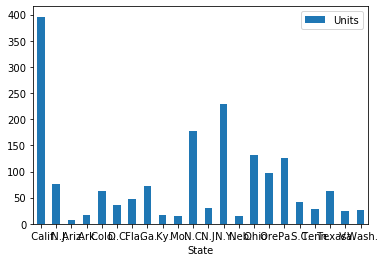

In [48]:
ax = State.plot.bar(x='State', y='Units', rot=0)

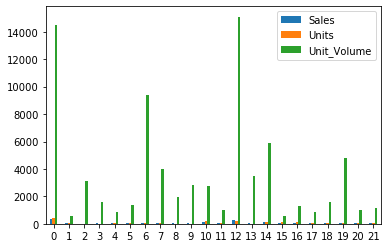

In [49]:
ax = State.plot.bar(rot=0)

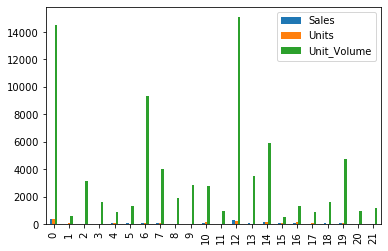

In [50]:
State.plot(kind='bar')

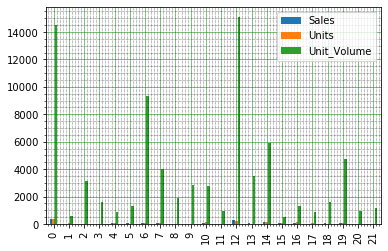

In [51]:
State.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green', label=State['State'])
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
plt.show()

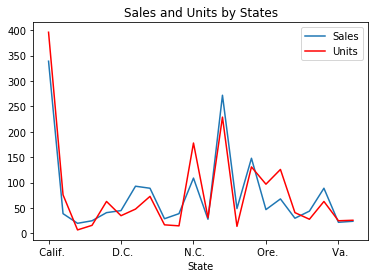

In [156]:
# gca stands for 'get current axis'
ax = plt.gca()
plt.title('Sales and Units by States')
State.plot(kind='line',x='State',y='Sales',ax=ax)
State.plot(kind='line',x='State',y='Units', color='red', ax=ax)

plt.show()

In [ ]:
# Save as pic. Pic has the chosen name and is located in the root 

In [ ]:
# plt.savefig('outputfile.png'):

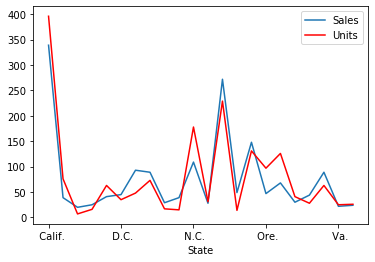

In [155]:
# gca stands for 'get current axis'
ax = plt.gca()

State.plot(kind='line',x='State',y='Sales',ax=ax)
State.plot(kind='line',x='State',y='Units', color='red', ax=ax)
plt.savefig('outputfile.png')
plt.show()

In [ ]:
# Figures for academics papers must be saved with .pdf extention or .png more dpi=300

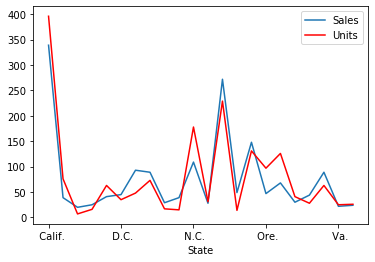

In [170]:
# gca stands for 'get current axis'
ax = plt.gca()

State.plot(kind='line',x='State',y='Sales',ax=ax)
State.plot(kind='line',x='State',y='Units', color='red', ax=ax)
plt.savefig('outputfile.png',dpi=300)
plt.show()

In [148]:
sns.countplot('Sales', data=State, ax=ax[1])
ax[1].set_ylabel('')

TypeError: 'AxesSubplot' object is not subscriptable

In [ ]:
# Documentação oficial do Matplotlib
# A seguir, alguns exemplos de argumentos que podem ser aplicados ao método plot( ).



# color: cor (ver exemplos abaixo)

# label: rótulo

# linestyle: estilo de linha (ver exemplos abaixo)

# linewidth: largura da linha

# marker: marcador (ver exemplos abaixo)



# CORES (color)
# 'b' blue

# 'g' green

# 'r' red

# 'c' cyan

# 'm' magenta

# 'y' yellow

# 'k' black

# 'w' white



# Marcadores (marker)
# '.' point marker

# ',' pixel marker

# 'o' circle marker

# 'v' triangle_down marker

# '^' triangle_up marker

# '<' triangle_left marker

# '>' triangle_right marker

# '1' tri_down marker

# '2' tri_up marker

# '3' tri_left marker

# '4' tri_right marker

# 's' square marker

# 'p' pentagon marker

# '*' star marker

# 'h' hexagon1 marker

# 'H' hexagon2 marker

# '+' plus marker

# 'x' x marker

# 'D' diamond marker

# 'd' thin_diamond marker

# '|' vline marker

# '_' hline marker





# Tipos de linha (linestyle)
# '-' solid line style

# '--' dashed line style

# '-.' dash-dot line style

# ':' dotted line style